In [1]:
import pandas as pd
import numpy as np

## Reading Data

In [2]:
df=pd.read_csv('E:\Project\Prediction\data.csv')
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [4]:
df['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [5]:
df.fillna(df.mean(),inplace=True)
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
df.shape

(506, 14)

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

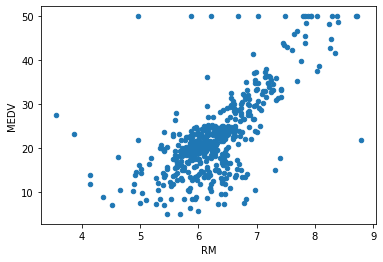

In [7]:
df.plot(kind='scatter',x='RM',y='MEDV',alpha=1)

## Train-Test Splitting

In [8]:
from sklearn.model_selection import train_test_split
train_set,test_set= train_test_split(df,random_state=42,test_size=0.2)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 404
Rows in test set: 102



## Shuffle-Split

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit
split= StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(df,df['CHAS']):
    strat_test_set=df.iloc[test_index]
    strat_train_set=df.iloc[train_index]

In [10]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [11]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [12]:
dftt=strat_train_set.drop(['MEDV'],axis=1)
dftt_label=strat_train_set['MEDV']

In [13]:
dftt_label.head(5)

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
Name: MEDV, dtype: float64

In [14]:
dftt.shape

(404, 13)

## Creating Pipeline

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipe=Pipeline([
    ('std_scaler',StandardScaler())
])

In [16]:
dftt_pp=my_pipe.fit_transform(dftt)
dftt_pp.shape

(404, 13)

## Using Algorithm

In [17]:
#from sklearn.linear_model import LinearRegression
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
#model=LinearRegression()
#model=DecisionTreeRegressor()
#model=GradientBoostingRegressor()
model=RandomForestRegressor()
model.fit(dftt_pp,dftt_label)

RandomForestRegressor()

In [18]:
dftt_pp_lol=model.predict(dftt_pp)
dftt_pp_lol

array([22.43 , 25.644, 16.492, 23.377, 23.472, 17.211, 24.547, 26.463,
       10.703, 32.362, 15.885, 18.366, 10.983, 34.224, 22.796, 13.96 ,
       18.515, 17.613,  7.009, 20.415, 19.019, 17.128, 18.217, 27.306,
       24.388, 24.702, 13.578, 21.026, 14.931, 28.438, 14.439, 18.008,
       11.305, 13.104, 20.275, 27.199, 23.368, 47.444, 33.336, 20.121,
       22.147, 35.529, 36.596,  9.465, 20.084, 12.501, 21.41 , 27.75 ,
       22.851,  7.582, 25.005, 22.937, 23.714, 31.023, 14.927, 37.882,
       21.576, 25.464, 33.561, 17.118, 19.801, 19.786, 28.038, 21.11 ,
       14.349, 31.547, 49.628, 14.865, 26.958, 34.695, 22.405, 36.468,
       23.315, 10.064, 20.599, 27.523, 25.679, 15.234, 16.358, 18.813,
       31.757,  8.523, 19.443, 18.912, 26.104, 23.363, 30.214, 25.098,
       29.259, 16.509, 23.041, 29.776, 28.039, 20.016, 21.124, 34.595,
       29.789, 19.928, 23.372, 17.039, 12.476, 46.059, 20.337, 44.178,
       16.931, 15.897, 19.85 , 21.87 , 27.502, 17.16 , 17.053,  7.714,
      

In [19]:
list(dftt_label.head(5))

[21.9, 24.5, 16.7, 23.1, 23.0]

## Validating the Algorithm

In [20]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(dftt_label,dftt_pp_lol)
rmse=np.sqrt(mse)
rmse

1.1977496670220713

## Cross-Validation

In [21]:
from sklearn.model_selection import cross_val_score
score= cross_val_score(model,dftt_pp,dftt_label,scoring='neg_mean_squared_error',cv=10)
rmse2=np.sqrt(-score)
rmse2

array([2.82153053, 2.92820375, 4.42278777, 2.43916311, 3.4476478 ,
       2.73790615, 4.56633161, 3.34982587, 3.28067127, 3.35713055])

## Prediction using Test Set

In [22]:
final_test1=strat_test_set.drop(['MEDV'],axis=1)
final_test2=strat_test_set['MEDV']


In [23]:
final_test=my_pipe.fit_transform(final_test1)
test_prediction=model.predict(final_test)
test_prediction

array([24.76 ,  9.767, 25.608, 20.983, 17.214, 14.321, 18.843, 14.692,
       32.161, 42.634, 18.869,  8.859, 24.729, 27.552, 20.387, 12.508,
       32.603, 14.737, 23.418, 17.218, 19.16 , 15.306, 16.267, 21.537,
       18.531, 31.095, 16.434, 32.219,  9.809, 34.459, 23.744, 20.953,
       22.969,  8.823, 19.909, 12.564, 42.174, 24.3  , 23.543, 44.254,
       23.222, 25.627, 19.634, 22.131, 15.671, 33.102, 44.966, 21.058,
       18.461, 21.885, 21.432, 14.581, 18.89 , 15.118, 25.222, 33.716,
       41.115, 28.855, 18.307, 21.093, 46.742, 10.633, 19.005, 22.923,
       14.463, 39.433, 19.158, 16.788, 17.916, 34.523, 25.516, 22.885,
       19.916, 23.214, 35.395, 13.093, 15.351, 20.243, 21.495, 21.462,
       22.538, 21.709, 14.077, 23.259, 21.397, 21.324, 14.409, 20.948,
       21.818, 23.625, 17.839, 26.918,  8.947, 25.743, 15.812, 30.41 ,
       19.631, 31.136, 13.803, 26.032, 18.536, 16.841])

In [24]:
from joblib import dump, load
dump(model, 'PricePrediction.joblib') 

['PricePrediction.joblib']

In [25]:
from joblib import dump, load
import numpy as np
model = load('PricePrediction.joblib') 
features = np.array([[4.87141, 0.0, 18.10, 0, 0.614, 6.484, 93.6, 2.3053, 666, 20.2, 396.21, 18.68, 102.714374]])
model.predict(features)

array([20.313])